In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from glob import glob

In [2]:
from object_detection_utilities import label_map_util
from object_detection_utilities import visualization_utils as vis_util
from object_detection_classifier import ObjectDetectionClassifier

object_detection_utilities/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/kchandra/miniconda3/envs/per2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/kchandra/miniconda3/envs/per2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/kchandra/miniconda3/envs/per2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kchandra/miniconda3/envs/per2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kchandra/miniconda3/envs/per2/lib/pytho

### Image utils

In [3]:
def get_image_glob(PATH_TO_TEST_IMAGES_DIR):
    print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
    TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
    print("Length of image folder:", len(TEST_IMAGE_PATHS))
    return TEST_IMAGE_PATHS

### Setup the data variables

In [4]:
ssd_sim_inception_model_path = 'frozen_models/frozen_sim_inception/frozen_inference_graph.pb'
ssd_real_inception_model_path = 'frozen_models/frozen_real_inception/frozen_inference_graph.pb'

PATH_TO_LABELS = 'label_map.pbtxt'
NUM_CLASSES = 14

fx_sim =  0.97428
fy_sim =  1.73205

fx_real =  1345.200806
fy_real =  1353.838257

SIM_IMAGES_PATH = 'data/test_images_sim'
REAL_IMAGES_PATH = 'data/test_images_udacity'
IMAGE_SIZE=(12,8) #size in inches

### Have a look on label map

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)


{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [6]:
def classify_image_folder(folder_path):
    image_glob = get_image_glob(folder_path)
    for image_path in image_glob:
        image = Image.open(image_path)

        class_name = classifier.classify_image(image)
        print(image_path + " : " + class_name )

In [7]:
def visualize_image_folder(folder_path, IMAGE_SIZE):
    image_glob = get_image_glob(folder_path)
    for image_path in image_glob:
        image = Image.open(image_path)
        image_np = classifier.visualize_detection(image)
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(image_np)
        plt.show()

## Test the Simulator Model

In [8]:
classifier = ObjectDetectionClassifier(ssd_sim_inception_model_path, PATH_TO_LABELS, NUM_CLASSES, fx_sim, fy_sim)

Loaded frozen model graph


In [9]:
classify_image_folder(SIM_IMAGES_PATH)

data/test_images_sim/*.jpg
('Length of image folder:', 12)
('Distance (metres)', 0.0)
data/test_images_sim/left0048.jpg : UNKNOWN
('Distance (metres)', 0.0)
data/test_images_sim/left0607.jpg : Red
('Distance (metres)', 0.0)
data/test_images_sim/left0606.jpg : Red
('Distance (metres)', 0.0)
data/test_images_sim/left0003.jpg : Green
('Distance (metres)', 0.0)
data/test_images_sim/left0588.jpg : Yellow
('Distance (metres)', 0.0)
data/test_images_sim/left0560.jpg : Green
('Distance (metres)', 0.0)
data/test_images_sim/left0011.jpg : Yellow
('Distance (metres)', 0.0)
data/test_images_sim/left0034.jpg : Red
('Distance (metres)', 0.0)
data/test_images_sim/left0545.jpg : Green
('Distance (metres)', 0.0)
data/test_images_sim/left0036.jpg : Red
('Distance (metres)', 0.0)
data/test_images_sim/left0027.jpg : Red
('Distance (metres)', 0.0)
data/test_images_sim/left0040.jpg : Red


data/test_images_sim/*.jpg
('Length of image folder:', 12)


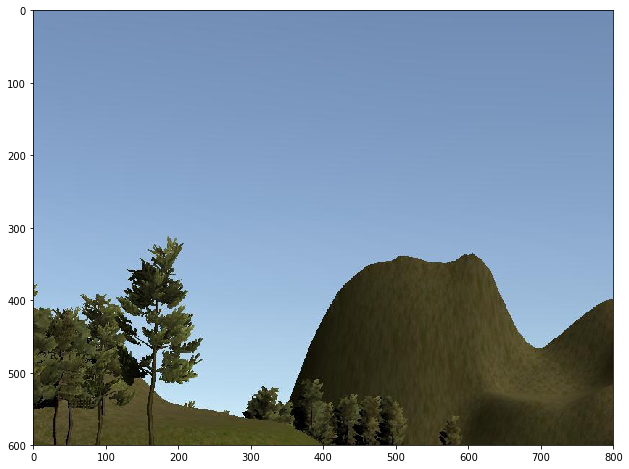

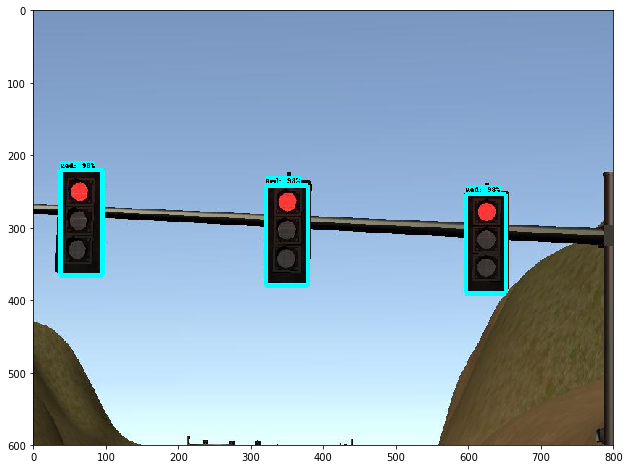

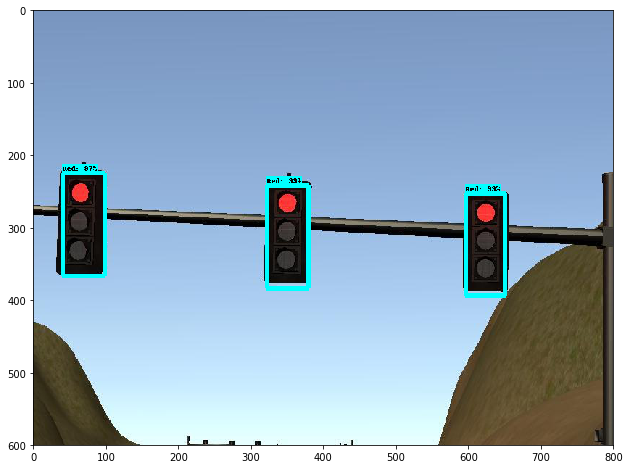

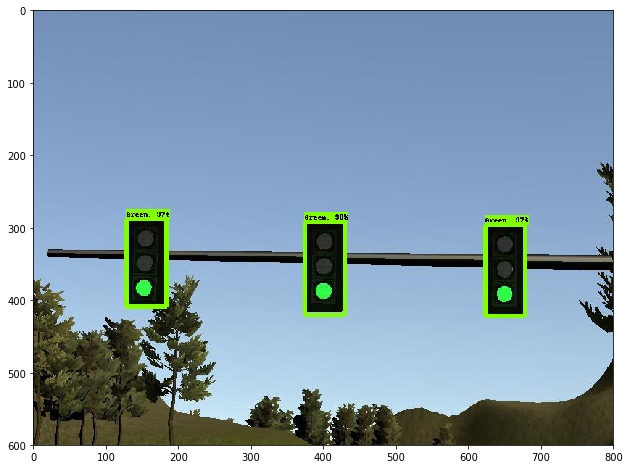

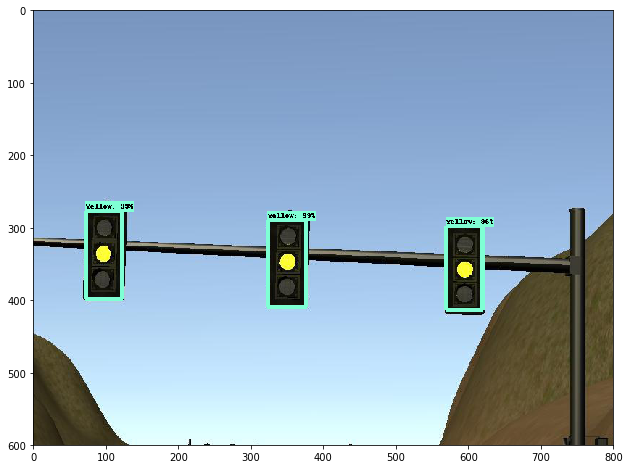

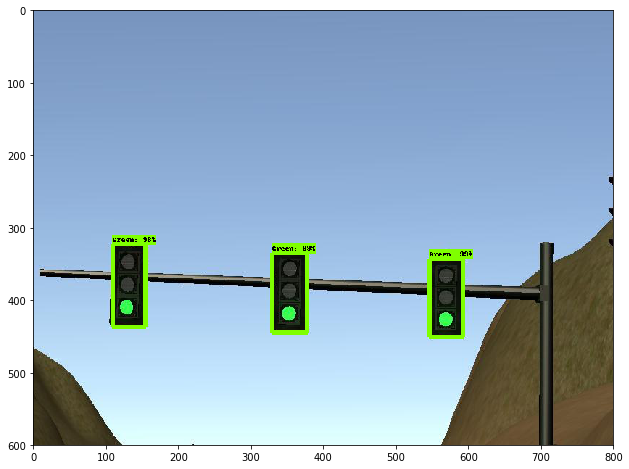

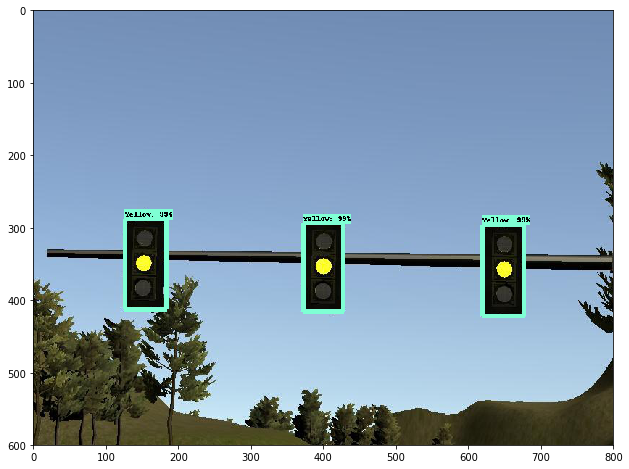

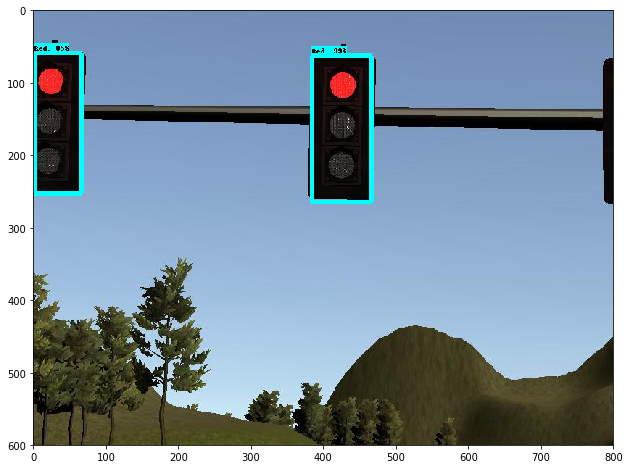

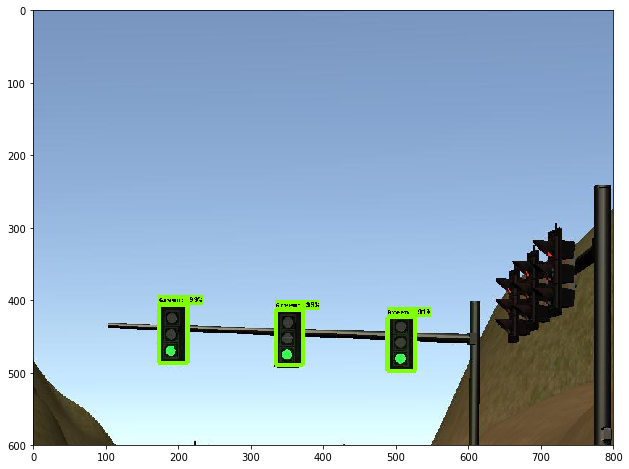

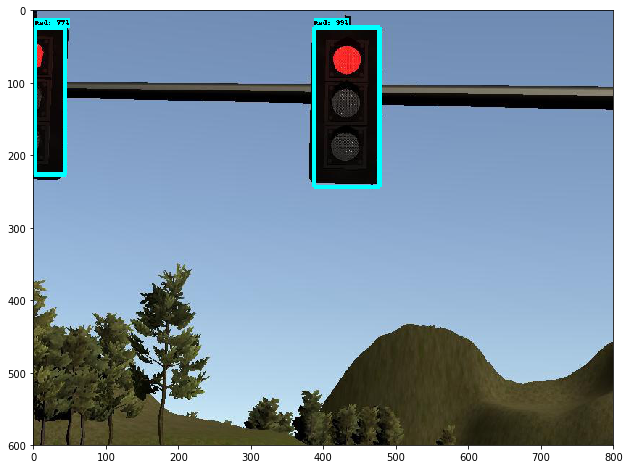

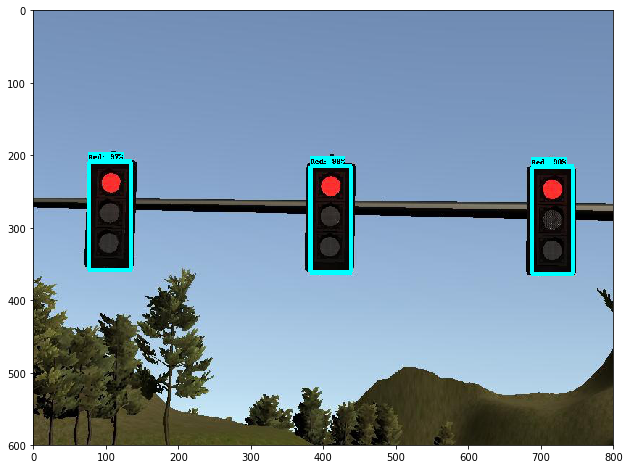

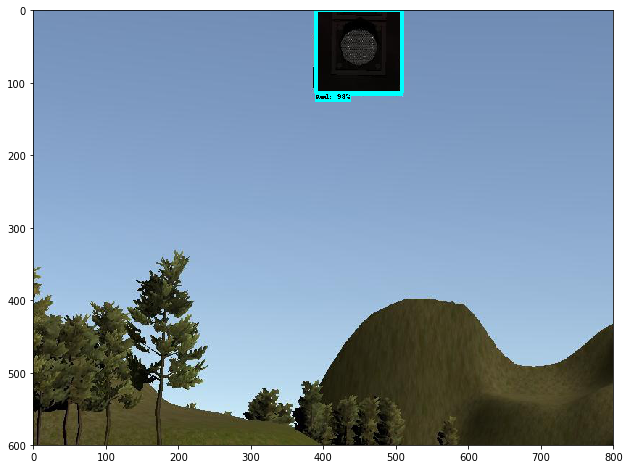

In [10]:
visualize_image_folder(SIM_IMAGES_PATH, IMAGE_SIZE)


## Test with Real Images

In [11]:
classifier = ObjectDetectionClassifier(ssd_real_inception_model_path, PATH_TO_LABELS, NUM_CLASSES, fx_sim, fy_sim)

Loaded frozen model graph


In [12]:
classify_image_folder(REAL_IMAGES_PATH)

data/test_images_udacity/*.jpg
('Length of image folder:', 9)


object_detection_classifier.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  perceived_depth_x = ((.1 * self.fx) / perceived_width_x)
object_detection_classifier.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  perceived_depth_y = ((.3 * self.fy) / perceived_width_y)


('Distance (metres)', inf)
data/test_images_udacity/left0528.jpg : Red
('Distance (metres)', inf)
data/test_images_udacity/left0701.jpg : Yellow
('Distance (metres)', inf)
data/test_images_udacity/left0000.jpg : Green
('Distance (metres)', inf)
data/test_images_udacity/left0358.jpg : Green
('Distance (metres)', inf)
data/test_images_udacity/left0561.jpg : Red
('Distance (metres)', inf)
data/test_images_udacity/left0183.jpg : UNKNOWN
('Distance (metres)', inf)
data/test_images_udacity/left0140.jpg : Red
('Distance (metres)', inf)
data/test_images_udacity/left0282.jpg : Green
('Distance (metres)', inf)
data/test_images_udacity/left0681.jpg : Green


In [ ]:
visualize_image_folder(REAL_IMAGES_PATH, IMAGE_SIZE)